<a href="https://colab.research.google.com/github/Tiblonde/pytorch-learning/blob/main/VAE_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 超参数
input_dim = 784  # MNIST图像大小 28*28
hidden_dim = 400
latent_dim = 20
batch_size = 128
epochs = 10
device = torch.device("cuda" if () else "cpu")

# 定义VAE模型
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        # 编码器
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)  # 输出均值
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)  # 输出log方差(将这个向量展开成对角矩阵)

        # 解码器
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # 输出范围[0,1]
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h) # 对数方差
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)  # 计算标准差
        eps = torch.randn_like(std)    # 从标准正态分布采样
        return mu + eps * std          # 重参数化

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# 损失函数
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, input_dim), reduction='sum')
    # KL散度(Tr + uTu - k - logdet)
    KLD = 0.5 * torch.sum(logvar.exp() + mu.pow(2) - 1 - logvar)
    return BCE + KLD

In [ ]:
# 数据加载
transform = transforms.ToTensor()
mnist = datasets.MNIST('./data', train=True, download=True, transform=transform)
dataloader = DataLoader(mnist, batch_size=batch_size, shuffle=True)

# 初始化模型和优化器
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 模型总结
print(f"Model structure: {model}\n\n")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 342kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.16MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Model structure: VAE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU()
    (2): Linear(in_features=400, out_features=400, bias=True)
    (3): ReLU()
  )
  (fc_mu): Linear(in_features=400, out_features=20, bias=True)
  (fc_logvar): Linear(in_features=400, out_features=20, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=400, bias=True)
    (1): ReLU()
    (2): Linear(in_features=400, out_features=400, bias=True)
    (3): ReLU()
    (4): Linear(in_features=400, out_features=784, bias=True)
    (5): Sigmoid()
  )
)




In [ ]:
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(dataloader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {train_loss / len(dataloader.dataset):.4f}')

Epoch 1, Loss: 177.5079
Epoch 2, Loss: 129.2853
Epoch 3, Loss: 118.2700
Epoch 4, Loss: 113.5074
Epoch 5, Loss: 110.8713
Epoch 6, Loss: 109.1094
Epoch 7, Loss: 107.7704
Epoch 8, Loss: 106.7479
Epoch 9, Loss: 105.8111
Epoch 10, Loss: 105.0715


In [ ]:
# 生成新样本
model.eval()
with torch.no_grad():
    z = torch.randn(64, latent_dim).to(device)  # 从标准正态分布采样
    samples = model.decode(z).cpu()
    # samples 形状为 (64, 784)，可以重塑为 (64, 28, 28) 显示图像

In [ ]:
print(z.)

torch.Size([64, 20])


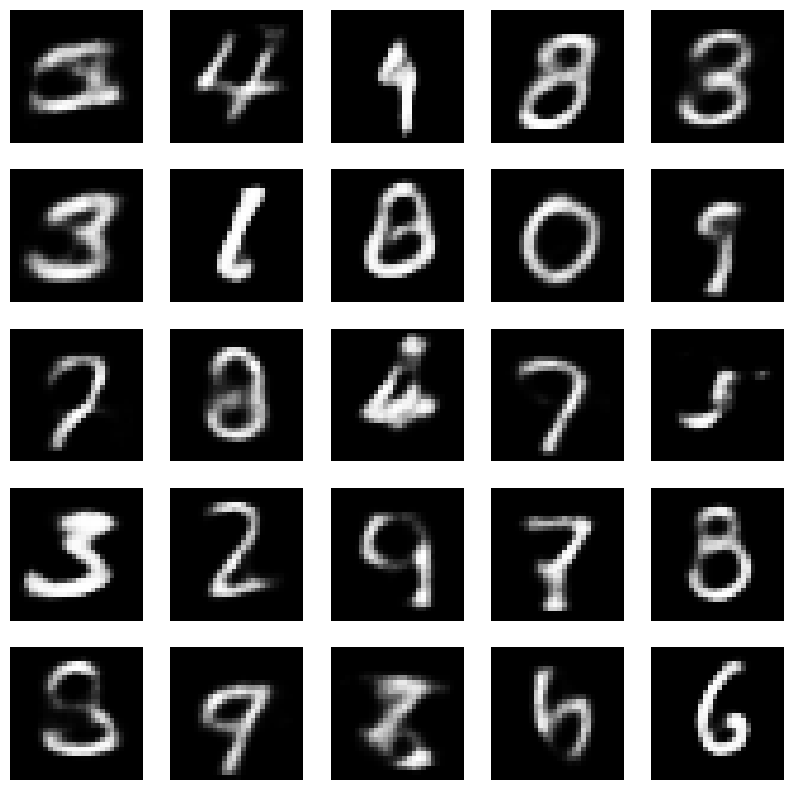

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample = samples[i].reshape(28, 28)
    plt.subplot(rows, cols, i)
    plt.imshow(sample, cmap='gray')
    plt.axis('off')

plt.show()

